# 10 Convolutional Neural Networks
CNNs) are a specialized type of artificial neural network designed for processing grid-like data, such as images. They are particularly well-suited for computer vision tasks due to their ability to automatically learn hierarchical representations from raw pixel values.
CNNs have been highly successful in various applications, such as image classification, object detection, image segmentation, and more.

In [1]:
import tensorflow as tf
from keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import itertools

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

1. Dataset Preparation:
* Download and preprocess the Caltech-256 dataset. You can use the tensorflow_datasets library to load the dataset conveniently.
* Normalize the pixel values of the images to the range [0, 1].
* Split the dataset into training and testing sets.

In [2]:
(train_dataset, test_dataset), dataset_info = tfds.load(
    name='caltech101',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
    data_dir='C:\\Users\\ivanc\\PycharmProjects\\scientificProject',

)

num_classes = dataset_info.features['label'].num_classes

def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess_image).shuffle(1000).batch(150)
test_dataset = test_dataset.map(preprocess_image).batch(75)

2. Build the CNN Model:
Define a CNN model with the following architecture:
* Convolutional Layer 1: 32 filters, kernel size (3x3), ReLU activation.
* Max Pooling Layer 1: Pooling size (2x2).
* Convolutional Layer 2: 64 filters, kernel size (3x3), ReLU activation.
* Max Pooling Layer 2: Pooling size (2x2).
* Flatten the feature maps.
* Fully Connected Layer 1: 128 units, ReLU activation.
* Output Layer: Number of units equal to the number of classes in the Caltech-101 dataset.

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

3. Training the Model:
* Compile the model with an appropriate optimizer and loss function.
* Train the model using the training dataset and validate it using the testing dataset.
* Observe the training process, including the loss and accuracy metrics.

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 16s 376ms/step - loss: 6.4877 - accuracy: 0.0155 - val_loss: 4.5674 - val_accuracy: 0.0392
Epoch 2/100
17/17 [==============================] - 5s 220ms/step - loss: 4.4215 - accuracy: 0.0739 - val_loss: 4.3170 - val_accuracy: 0.0801
Epoch 3/100
17/17 [==============================] - 4s 219ms/step - loss: 3.6316 - accuracy: 0.2373 - val_loss: 4.0035 - val_accuracy: 0.1454
Epoch 4/100
17/17 [==============================] - 5s 232ms/step - loss: 2.2132 - accuracy: 0.5331 - val_loss: 3.9330 - val_accuracy: 0.2173
Epoch 5/100
17/17 [==============================] - 5s 232ms/step - loss: 0.8661 - accuracy: 0.8231 - val_loss: 4.3261 - val_accuracy: 0.2124
Epoch 6/100
17/17 [==============================] - 5s 232ms/step - loss: 0.2913 - accuracy: 0.9481 - val_loss: 4.7445 - val_accuracy: 0.2598
Epoch 7/100
17/17 [==============================] - 5s 233ms/step - loss: 0.0773 - accuracy: 0.9894 - val_loss: 5.1229 - val_accuracy: 0.245

4. Understanding Parameter Sharing and Local Receptive Fields:
* Analyze the number of learnable parameters in each layer of the CNN model.

¿What is parameter sharing? ¿What's its role in reducing the model's complexity?

In [5]:
num_params = model.count_params()
print(f"Number of trainable parameters in the model: {num_params}")

Number of trainable parameters in the model: 23920550


5. Evaluation and Interpretation:
* Evaluate the model's performance on the testing dataset and calculate the accuracy.
* Visualize some misclassified images and discuss the possible reasons for misclassifications.

In [6]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

9/9 [==============================] - 0s 44ms/step - loss: 6.1229 - accuracy: 0.2745
Accuracy on the test set: 27.45%


1/1 [==============================] - 0s 25ms/step


ValueError: num must be an integer with 1 <= num <= 25, not 26

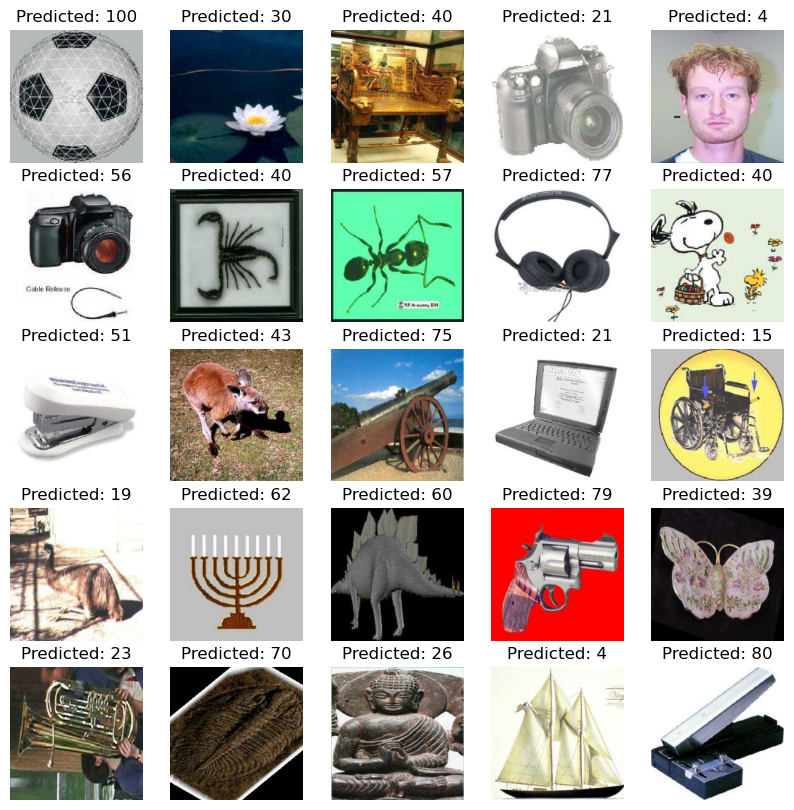

In [7]:
misclassified_images = []
misclassified_labels = []
for image, label in test_dataset:
    predictions = model.predict(image)
    predicted_label = np.argmax(predictions, axis=1)
    misclassified_idx = np.where(predicted_label != label.numpy())[0]
    for idx in misclassified_idx:
        misclassified_images.append(image[idx])
        misclassified_labels.append(predicted_label[idx])

plt.figure(figsize=(10, 10))
for i in range(len(misclassified_images)):
    plt.subplot(5, 5, i+1)
    plt.imshow(misclassified_images[i])
    plt.title(f"Predicted: {misclassified_labels[i]}")
    plt.axis('off')
plt.show()

6. Pick a sample image and show the feature maps activated by the convolutional layers

1/1 [==============================] - 0s 158ms/step


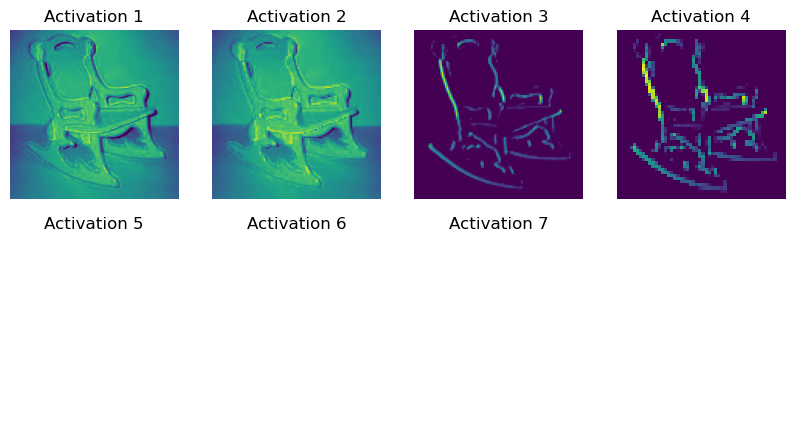

In [8]:
sample_image, _ = next(itertools.islice(iter(test_dataset), 0, 1))
sample_image = sample_image[:1]

activation_model = models.Model(inputs=model.input,
                                outputs=[layer.output for layer in model.layers])
# activation_model = models.Model(inputs=model.input, outputs=model.layers[4].output)
activations = activation_model.predict(sample_image)

plt.figure(figsize=(10, 5))
for i, activation in enumerate(activations):
    plt.subplot(2, 4, i+1)
    try:
        plt.imshow(activation[0, :, :, 0], cmap='viridis')
    except:
        pass
    plt.title(f"Activation {i+1}")
    plt.axis('off')
plt.show()